# First steps in image analysis with Python

In this very brief tutorial, you will learn how to open, inspect and work with basic image types in Python. For simplicity, we will work on `blobs.tif` which everyone can get locally from Fiji.

First we will import some typically used libraries for image analysis: 
- `matplotlib.pyplot` very often used for plotting, graphics, etc
- `skimage` a.k.a. scikit-image - versatile image processing library for Python
- `pandas`: Handling tabular data in Python

In this notebook, we introduce and use some important techniques:
- **Calling functions from modules**: Functions are powerful tools that come with Python packages and which are often organized in modules. They are typically "called" using the following syntax: `result = module.function(argument)`.
- **Inspecting functions**: If we need to know more about what a function does, what arguments it requires or returns we can use one of the following commands: `help(some_function)` or `some_function?` (works only in jupyter)
- **Indexing arrays**: Sometimes we are only interested in parts of an image (a.k.a. a 2D array). Just like with lists or similar variable types, we can access parts of arrays with square brackets: `image_part = image[100:200, 100:200]`. This command crops out a 100x100-sized patch from the variable `image`.
- **Plotting with matplotlib**: Working with indeces and arrays can be a bit difficult to visualize so it is strongly required when working with images to often plot the images along the workflow to see what is happening.

In [1]:
import matplotlib.pyplot as plt  # We can also import a module with a nickname!
from skimage import measure, io, filters
import pandas

First cool Python hack: Using literal strings (`r'some string'`) can help A LOT when navigating file paths. If this is used, it doesn't make a difference anymore whether / or \ is used in the filepath.

Hint: remember to replace `'C:\Users\johan\Desktop\blobs.tif'` below by your local address of `blobs.tif`

In [2]:
#image = io.imread('C:\Users\johan\Desktop\blobs.tif')  # This does not work

In [3]:
image = io.imread(r'C:\Users\johan\Desktop\blobs.tif')  # This works
image

array([[ 40,  32,  24, ..., 216, 200, 200],
       [ 56,  40,  24, ..., 232, 216, 216],
       [ 64,  48,  24, ..., 240, 232, 232],
       ...,
       [ 72,  80,  80, ...,  48,  48,  48],
       [ 80,  80,  80, ...,  48,  48,  48],
       [ 96,  88,  80, ...,  48,  48,  48]], dtype=uint8)

Here is how you show an image with matplotlib: `plt.imshow(some_image)`
The command is simple, but allows a large variety of customization. To explor some of the possibilities, type: `help(plt.imshow)` 

In [4]:
help(plt.imshow)

Help on function imshow in module matplotlib.pyplot:

imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)
    Display data as an image, i.e., on a 2D regular raster.
    
    The input may either be actual RGB(A) data, or 2D scalar data, which
    will be rendered as a pseudocolor image. For displaying a grayscale
    image set up the colormapping using the parameters
    ``cmap='gray', vmin=0, vmax=255``.
    
    The number of pixels used to render an image is set by the Axes size
    and the *dpi* of the figure. This can lead to aliasing artifacts when
    the image is resampled because the displayed image size will usually
    not match the size of *X* (see
    :doc:`/gallery/images_contours_and_fields/image_antialiasing`).
    The resampling can be controlled via the *interpolation* parameter
    and/or 

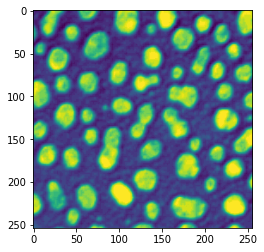

In [5]:
plt.figure()
plt.imshow(image)

If you want to display an image smaller or large, here's a few plot options you can use to enlarge the figure or show only parts of it:

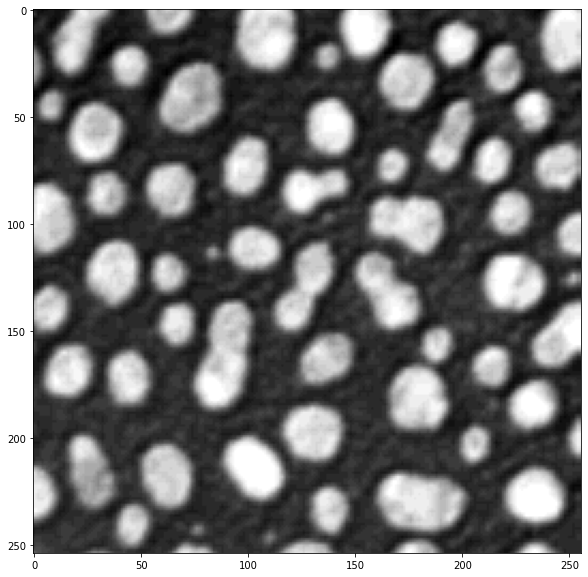

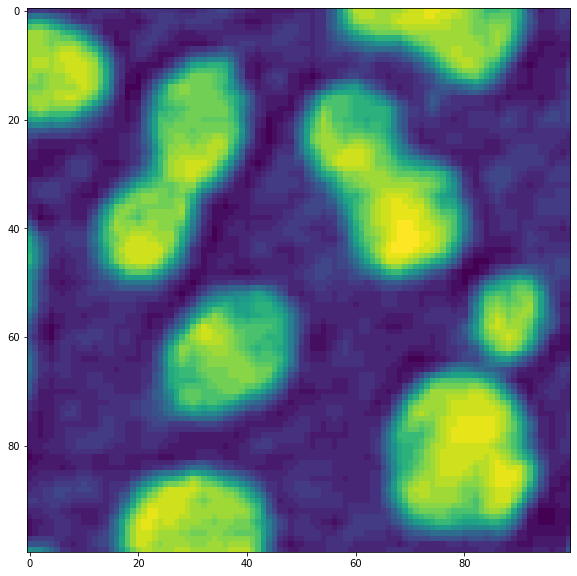

In [6]:
plt.figure(figsize=(10,10))  # resize the plot to 10x10
plt.imshow(image, cmap='gray')  # use a different colormap

plt.figure(figsize=(10,10))  # resize the plot to 10x10
plt.imshow(image[100:200, 100:200])  # zoom in to a specific region

As a simple exercise for some measurements, let's threshold this image and turn it into a label map. Note that `filters.threshold_otsu()` returns only the threshold value, not the thresholded image! To apply the threshold, we have to compare every pixel with the threshold value:

In [7]:
threshold = filters.threshold_otsu(image)

In [8]:
image > threshold

array([[False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

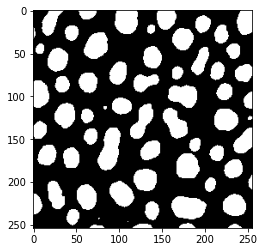

In [9]:
image_thresholded = image > threshold
plt.imshow(image_thresholded, cmap='gray')

Lastly, we will turn this into a label map, which means that we will assign a number to connected pixels, thus retrieving instances of cells from a collection of positive (1) and negative (0) pixels.

In [10]:
labels = measure.label(image_thresholded)
labels

array([[0, 0, 0, ..., 5, 5, 5],
       [0, 0, 0, ..., 5, 5, 5],
       [0, 0, 0, ..., 5, 5, 5],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

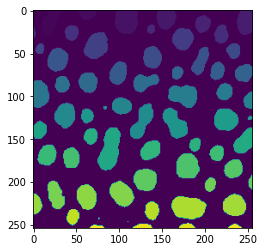

In [11]:
plt.figure()
plt.imshow(labels)

Now, let's measure some actual properties of our cells. For this we will use the `regionprops_table()` function from `skimage.measure`.

*Note*: Scikit-image provides two implementations of the regionprops function, one is called `regionprops()` and one is called `regionprops_table()`. They both do the same, but return the measured values in a different format. We will stick to `regionprops_table` because it allows to easily convert data to pandas DataFrames (python tables).

In [12]:
help(measure.regionprops)

Help on function regionprops in module skimage.measure._regionprops:

regionprops(label_image, intensity_image=None, cache=True, coordinates=None, *, extra_properties=None)
    Measure properties of labeled image regions.
    
    Parameters
    ----------
    label_image : (M, N[, P]) ndarray
        Labeled input image. Labels with value 0 are ignored.
    
        .. versionchanged:: 0.14.1
            Previously, ``label_image`` was processed by ``numpy.squeeze`` and
            so any number of singleton dimensions was allowed. This resulted in
            inconsistent handling of images with singleton dimensions. To
            recover the old behaviour, use
            ``regionprops(np.squeeze(label_image), ...)``.
    intensity_image : (M, N[, P][, C]) ndarray, optional
        Intensity (i.e., input) image with same size as labeled image, plus
        optionally an extra dimension for multichannel data. Currently,
        this extra channel dimension, if present, must be the l

In this case, let' measure the properties `label` and `area` of or label image:

In [13]:
results = measure.regionprops_table(labels, properties=['label', 'area'])

In [14]:
pandas.DataFrame(results)

,label,area
0,1,433
1,2,185
2,3,658
3,4,434
4,5,477
...,...,...
59,60,1
60,61,81
61,62,90
62,63,53


Last but not least, let's visualize the area measurement as a histogram. We can easily access the data in the created DataFrame similarly to how we access data in dictionaries. Columns in Dataframes can generally be accessed like this: `column_data = my_dataframe['column_name']`:

(array([11.,  5., 11.,  6., 11.,  6.,  7.,  5.,  0.,  2.]),
 array([  1. ,  91.1, 181.2, 271.3, 361.4, 451.5, 541.6, 631.7, 721.8,
        811.9, 902. ]),
 <BarContainer object of 10 artists>)

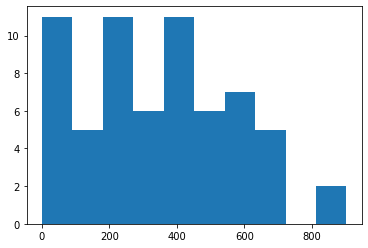

In [15]:
data = results['area']
plt.hist(data)

(array([11.,  5., 11.,  6., 11.,  6.,  7.,  5.,  0.,  2.]),
 array([  1. ,  91.1, 181.2, 271.3, 361.4, 451.5, 541.6, 631.7, 721.8,
        811.9, 902. ]),
 <BarContainer object of 10 artists>)

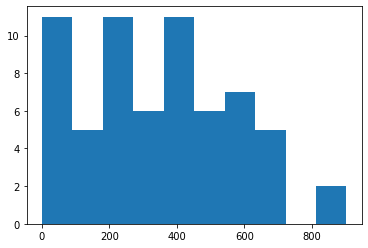

In [16]:
# or, shorter:
plt.hist(results['area'])